# 🏠 Machine Learning Analysis of Housing Data with Linear & Logistic Regression
Project 5 - Regression Machine Learning (Linear and Decision Tree) Housing Sales Price
<h3> ANALYST: Dwight Francis M. Caña
<hr>

## 📄 Overview
This project uses **Linear Regression** and **Logistic Regression** to analyze housing data and predict house prices. Linear Regression predicts the **expected sale price**, while Logistic Regression classifies houses as **above or below the median price**. The analysis provides actionable insights for **buyers, sellers, and investors**.  

---

## 🛠 Features Used
The model focuses on **key features** that impact house prices:

- 🏗 `OverallQual` – Overall quality of the house  
- 📏 `GrLivArea` – Above-ground living area in square feet  
- 🚗 `GarageCars` – Number of cars that fit in the garage  
- 🏠 `TotalBsmtSF` – Total basement square footage  
- 🛁 `FullBath` – Number of full bathrooms  
- 📅 `YearBuilt` – Year the house was built  
- 🏡 `TotRmsAbvGrd` – Total rooms above ground  
- 🔥 `Fireplaces` – Number of fireplaces  
- 🌳 `LotArea` – Lot size  
- 📍 `Neighborhood` – Location of the house  

---

## 📊 Methodology

### Linear Regression
- Predicts the **exact sale price** of a house.  
- Evaluated using **RMSE (Root Mean Squared Error)**.  
- Example Insight:  
  - 💰 Predicted SalePrice: **$222,925** → Above the median, likely a **premium home**.  
  - 💸 Predicted SalePrice: **$153,402** → Below the median, a **moderately priced home**.  

### Logistic Regression
- Classifies houses as **High Price (above median)** or **Low Price (below median)**.  
- Evaluated using **accuracy score**.  
- ✅ Example Accuracy: **93.15%**, showing the model reliably distinguishes premium vs. affordable homes.

---

## 📈 Visualizations
The project includes **visualizations for predicted prices**, comparing individual houses to the **median price**.

```python
plt.bar(['Median Price', 'Predicted Price'], [median_price, predicted_price2], color=['gray', 'skyblue'])

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("housing_train.csv")
print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Id,1460.0,NaN,NaN,NaN,730.5,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,NaN,NaN,NaN,56.89726,42.300571,20.0,20.0,50.0,70.0,190.0
MSZoning,1460,5,RL,1151,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotFrontage,1201.0,NaN,NaN,NaN,70.049958,24.284752,21.0,59.0,69.0,80.0,313.0
LotArea,1460.0,NaN,NaN,NaN,10516.828082,9981.264932,1300.0,7553.5,9478.5,11601.5,215245.0
...,...,...,...,...,...,...,...,...,...,...,...
MoSold,1460.0,NaN,NaN,NaN,6.321918,2.703626,1.0,5.0,6.0,8.0,12.0
YrSold,1460.0,NaN,NaN,NaN,2007.815753,1.328095,2006.0,2007.0,2008.0,2009.0,2010.0
SaleType,1460,9,WD,1267,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SaleCondition,1460,6,Normal,1198,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [6]:
num_cols = df.select_dtypes(include=['number']).columns
cat_cols = df.select_dtypes(exclude=['number']).columns

df[num_cols] = df[num_cols].fillna(df[num_cols].mean())
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

In [7]:
df.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

In [8]:
ordinal_maps = {
    "ExterQual": {"Ex":5, "Gd":4, "TA":3, "Fa":2, "Po":1},
    "ExterCond": {"Ex":5, "Gd":4, "TA":3, "Fa":2, "Po":1},
    "BsmtQual": {"Ex":5, "Gd":4, "TA":3, "Fa":2, "Po":1, np.nan:0},
    "BsmtCond": {"Ex":5, "Gd":4, "TA":3, "Fa":2, "Po":1, np.nan:0},
    "BsmtExposure": {"Gd":4, "Av":3, "Mn":2, "No":1, np.nan:0},
    "BsmtFinType1": {"GLQ":6, "ALQ":5, "BLQ":4, "Rec":3, "LwQ":2, "Unf":1, np.nan:0},
    "BsmtFinType2": {"GLQ":6, "ALQ":5, "BLQ":4, "Rec":3, "LwQ":2, "Unf":1, np.nan:0},
    "HeatingQC": {"Ex":5, "Gd":4, "TA":3, "Fa":2, "Po":1},
    "KitchenQual": {"Ex":5, "Gd":4, "TA":3, "Fa":2, "Po":1},
    "FireplaceQu": {"Ex":5, "Gd":4, "TA":3, "Fa":2, "Po":1, np.nan:0},
    "GarageQual": {"Ex":5, "Gd":4, "TA":3, "Fa":2, "Po":1, np.nan:0},
    "GarageCond": {"Ex":5, "Gd":4, "TA":3, "Fa":2, "Po":1, np.nan:0},
    "PoolQC": {"Ex":4, "Gd":3, "TA":2, "Fa":1, np.nan:0},
}

In [9]:
for col, mapping in ordinal_maps.items():
    if col in df.columns:
        df[col] = df[col].map(mapping).astype(int)

df["GarageYrBlt"] = df["GarageYrBlt"].fillna(0).astype(int)

In [10]:
float_cols = ["LotFrontage", "MasVnrArea"]
df[float_cols] = df[float_cols].astype(float)

object_cols = df.select_dtypes(include=["object"]).columns
df[object_cols] = df[object_cols].astype("category")

df.dtypes

Id                  int64
MSSubClass          int64
MSZoning         category
LotFrontage       float64
LotArea             int64
                   ...   
MoSold              int64
YrSold              int64
SaleType         category
SaleCondition    category
SalePrice           int64
Length: 81, dtype: object

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             1460 non-null   int64   
 1   MSSubClass     1460 non-null   int64   
 2   MSZoning       1460 non-null   category
 3   LotFrontage    1460 non-null   float64 
 4   LotArea        1460 non-null   int64   
 5   Street         1460 non-null   category
 6   Alley          1460 non-null   category
 7   LotShape       1460 non-null   category
 8   LandContour    1460 non-null   category
 9   Utilities      1460 non-null   category
 10  LotConfig      1460 non-null   category
 11  LandSlope      1460 non-null   category
 12  Neighborhood   1460 non-null   category
 13  Condition1     1460 non-null   category
 14  Condition2     1460 non-null   category
 15  BldgType       1460 non-null   category
 16  HouseStyle     1460 non-null   category
 17  OverallQual    1460 non-null   in

# Create a Target for Logistic Regression

In [12]:
median_price = df['SalePrice'].median()
df['HighPrice'] = (df['SalePrice'] > median_price).astype(int)

# Select Features

In [13]:
features = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 
            'FullBath', 'YearBuilt', 'TotRmsAbvGrd', 'Fireplaces', 
            'LotArea', 'Neighborhood']

X = df[features] 
y_reg = df['SalePrice']  # Linear Regression target
y_clf = df['HighPrice']  # Logistic Regression target

categorical_features = ['Neighborhood']
numeric_features = [f for f in features if f not in categorical_features]


# Preprocess the Data

> Scale numeric features → make them similar scale.

> Encode categorical features → convert text into numbers.

In [14]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(drop='first'), categorical_features)
])

# Split Data into Train/Test

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train_reg, y_test_reg, y_train_clf, y_test_clf = train_test_split(
    X, y_reg, y_clf, test_size=0.2, random_state=42
)

# Linear Regression (Predict Price)

In [17]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np 

X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.transform(X_test)


lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train_reg)

# Predict
y_pred_reg = lr_model.predict(X_test_scaled)

# Evaluate 
mse = mean_squared_error(y_test_reg, y_pred_reg)
rmse = np.sqrt(mse)
print(f"Linear Regression RMSE: ${rmse:,.2f}")

Linear Regression RMSE: $36,330.79


<h3>Insight: </h3>
The model has an average error of about $36k, which is enough to give a quick, reliable sense of whether a home is priced appropriately without needing a full appraisal.

# Logistic Regression (Classify High/Low Price)

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Train Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_scaled, y_train_clf)

# Make predictions
y_pred_clf = log_model.predict(X_test_scaled)

# Evaluate
accuracy = accuracy_score(y_test_clf, y_pred_clf)
print(f"Logistic Regression Accuracy: {accuracy:.2%}")

Logistic Regression Accuracy: 93.15%


<h3>Insight: </h3>
The model correctly classifies homes as above or below the median price about 93% of the time, making it a reliable way to quickly flag properties as either ‘premium’ or ‘affordable’ without needing the exact price.

<h3>Insight: </h3>
The model gives buyers, sellers, and investors a quick way to filter homes 
even without exact price predictions. It helps them focus on higher-value properties or spot more affordable options. It also points out the key features, like OverallQual and GrLivArea, that most influence price categories.
<hr>

<h2>Decision Tree Regressor

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree
from sklearn.metrics import mean_squared_error, accuracy_score
import matplotlib.pyplot as plt

df['HighPrice'] = (df['SalePrice'] > df['SalePrice'].median()).astype(int)
features = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF']
X = df[features]
y_reg = df['SalePrice']      # Regression target
y_clf = df['HighPrice']      # Classification target
X_train, X_test, y_train_reg, y_test_reg = train_test_split(X, y_reg, test_size=0.2, random_state=42)
_, _, y_train_clf, y_test_clf = train_test_split(X, y_clf, test_size=0.2, random_state=42)

reg_tree = DecisionTreeRegressor(max_depth=5, random_state=42)
reg_tree.fit(X_train, y_train_reg)
y_pred_reg = reg_tree.predict(X_test)
mse = mean_squared_error(y_test_reg, y_pred_reg)
print(f"Decision Tree Regressor Mean Squared Error: {mse:.2f}")


Decision Tree Regressor Mean Squared Error: 1337642320.89


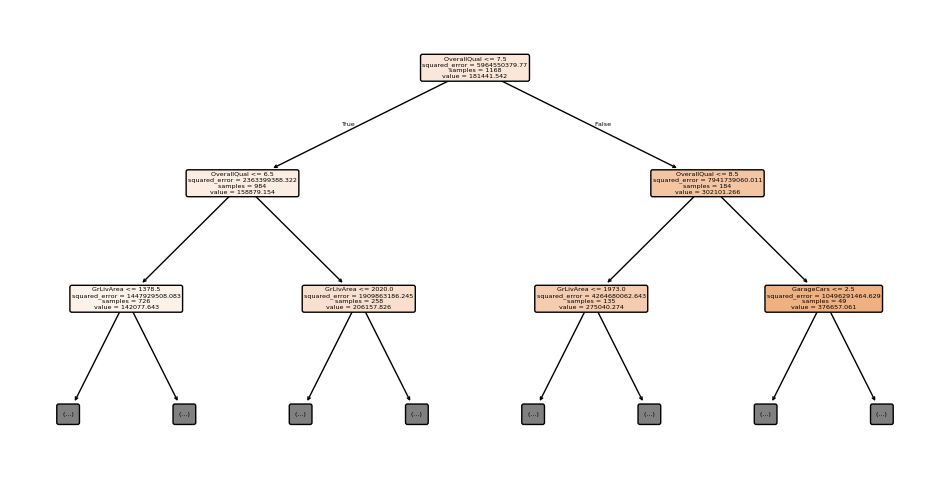

In [24]:
plt.figure(figsize=(12,6))
plt.title("Predicting Housing Prices with Decision Tree Regressor", fontsize=14)
plot_tree(reg_tree, feature_names=features, filled=True, rounded=True, max_depth=2) 
plt.show()

<h3>Insight: </h3>
The strongest drivers of house prices are Overall Quality and Living Area. Higher-quality homes with larger spaces consistently cost more. Even with a shallow tree, these patterns are clear and easy to interpret.
<hr>

<h2>Decision Tree Classifier

In [25]:
clf_tree = DecisionTreeClassifier(max_depth=3, random_state=42)
clf_tree.fit(X_train, y_train_clf)
y_pred_clf = clf_tree.predict(X_test)


accuracy = accuracy_score(y_test_clf, y_pred_clf)
print(f"Decision Tree Classifier Accuracy: {accuracy:.2f}")

Decision Tree Classifier Accuracy: 0.88


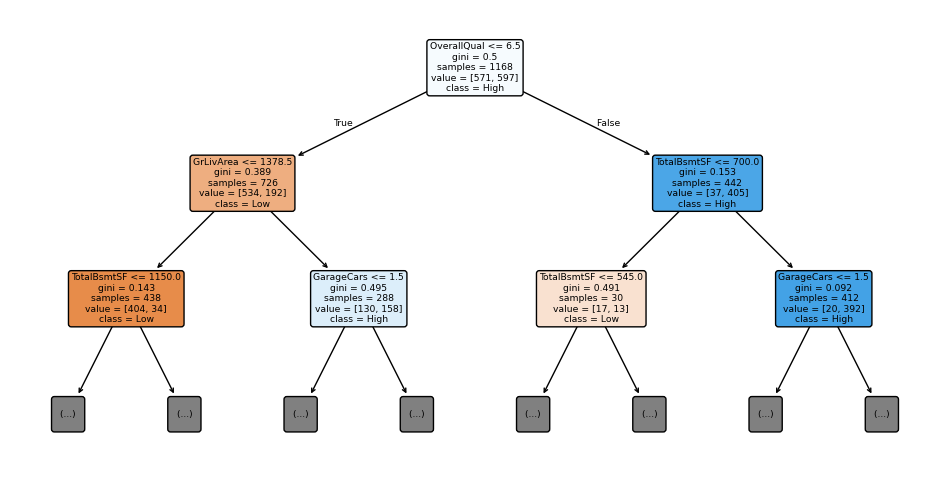

In [26]:
plt.figure(figsize=(12,6))
plt.title("Classifying High vs Low Priced Houses with Decision Tree", fontsize=14)
plot_tree(clf_tree, feature_names=features, class_names=['Low', 'High'], filled=True, rounded=True, max_depth=2)
plt.show()

<h3>Insight: </h3>
High-priced homes tend to have better overall quality and larger garages. The decision tree also shows that Living Area and Total Basement Space play key roles in separating higher-priced from lower-priced homes. Even this simple tree makes the main drivers easy to see.
<hr>